In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kaledhoshme
Your Kaggle Key: ··········


100%|██████████| 7.37k/7.37k [00:00<00:00, 1.95MB/s]

In [158]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [468]:
class SalaryPrediction:
  def __init__(self, datasetFolder, epochs, test_size, label):
    self.datasetFolder = datasetFolder
    self.epochs = epochs
    self.test_size = test_size
    self.label = label
  def readDataset(self):
    self.dataset = pd.read_csv(os.path.join(self.datasetFolder, "ds_salaries.csv"))
  def encoding_(self, column):
    self.en = preprocessing.LabelEncoder()
    self.en.fit(column)
    return self.en.transform(column)
  def encoding_columns(self, columns):
    for i in columns:
      self.dataset[i] = self.encoding_(self.dataset[i])
  def detect_Features_label(self):
    self.features = self.dataset.drop([self.label], axis = 1)
    self.target = self.dataset[self.label]
  def split_datset(self):
    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features,
                                                                            self.target, 
                                                                            test_size = self.test_size,
                                                                            random_state = 400
                                                                            )
  def normalizeInput(self):
    self.norm = tf.keras.layers.Normalization(input_shape = (self.features.shape[1],), axis = -1)
    self.norm.adapt(self.features)
  def model(self):
    m = tf.keras.models.Sequential()
    m.add(self.norm)
    m.add(tf.keras.layers.Dense(128, activation = "tanh"))
    m.add(tf.keras.layers.Dense(64, activation = "relu"))
    m.add(tf.keras.layers.Dense(1,))
    self.m = m
  def compile(self):
    self.m.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss='mean_absolute_percentage_error')
  def fit(self):
    self.history = self.m.fit(
                  self.x_train,
                  self.y_train,
                  epochs=self.epochs,
                  validation_data = (self.x_test, self.y_test),
                  callbacks = [tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                                mode="min", 
                                                                restore_best_weights=True, 
                                                                patience=800)])
  def plot_loss(self):
    plt.plot(self.history.history['loss'], label='loss')
    plt.plot(self.history.history['val_loss'], label='val_loss')
    plt.legend()       


In [469]:
SalaryPrediction = SalaryPrediction("data-science-job-salaries", 10000, 0.1, 'salary')

In [470]:
SalaryPrediction.readDataset()

In [471]:
SalaryPrediction.dataset.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [472]:
SalaryPrediction.dataset.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [473]:
SalaryPrediction.dataset.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [474]:
SalaryPrediction.dataset.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [475]:
SalaryPrediction.dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [476]:
columns = np.array(['experience_level', 'salary_currency', 'job_title', 'company_size', 'company_location', 'employee_residence',
           'employment_type'])

SalaryPrediction.encoding_columns(columns)

In [477]:
SalaryPrediction.detect_Features_label()

In [478]:
SalaryPrediction.features.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,7,79833,14,0,12,0
1,1,2020,3,2,41,16,260000,32,0,29,2
2,2,2020,3,2,7,8,109024,20,50,18,1
3,3,2020,2,2,47,16,20000,23,0,20,2
4,4,2020,3,2,38,16,150000,55,50,48,0


In [479]:
SalaryPrediction.target.head()

0     70000
1    260000
2     85000
3     20000
4    150000
Name: salary, dtype: int64

In [480]:
SalaryPrediction.split_datset()

In [481]:
SalaryPrediction.normalizeInput()

In [482]:
SalaryPrediction.model()

In [483]:
SalaryPrediction.m.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_24 (Normaliza  (None, 11)               23        
 tion)                                                           
                                                                 
 dense_174 (Dense)           (None, 128)               1536      
                                                                 
 dense_175 (Dense)           (None, 64)                8256      
                                                                 
 dense_176 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9,880
Trainable params: 9,857
Non-trainable params: 23
_________________________________________________________________


In [484]:
SalaryPrediction.compile()

In [485]:
SalaryPrediction.fit()

Streaming output truncated to the last 5000 lines.
18/18 [==============================] - 0s 3ms/step - loss: 10.0166 - val_loss: 8.2445
Epoch 1355/10000
18/18 [==============================] - 0s 3ms/step - loss: 9.9985 - val_loss: 8.2172
Epoch 1356/10000
18/18 [==============================] - 0s 3ms/step - loss: 10.0414 - val_loss: 8.2992
Epoch 1357/10000
18/18 [==============================] - 0s 3ms/step - loss: 10.0862 - val_loss: 8.2726
Epoch 1358/10000
18/18 [==============================] - 0s 3ms/step - loss: 10.1412 - val_loss: 8.3395
Epoch 1359/10000
18/18 [==============================] - 0s 3ms/step - loss: 10.0776 - val_loss: 8.2973
Epoch 1360/10000
18/18 [==============================] - 0s 3ms/step - loss: 10.0435 - val_loss: 8.2897
Epoch 1361/10000
18/18 [==============================] - 0s 3ms/step - loss: 10.0793 - val_loss: 8.2429
Epoch 1362/10000
18/18 [==============================] - 0s 3ms/step - loss: 10.1254 - val_loss: 8.2710
Epoch 1363/10000
18/18

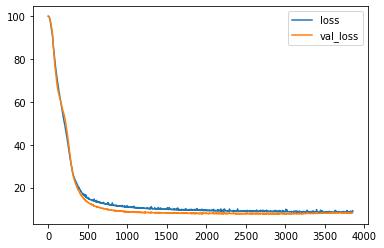

In [486]:
SalaryPrediction.plot_loss()

In [487]:
SalaryPrediction.m.evaluate(SalaryPrediction.x_test, SalaryPrediction.y_test)

2/2 [==============================] - 0s 4ms/step - loss: 7.6698


7.669816493988037

In [488]:
SalaryPrediction.m.evaluate(SalaryPrediction.x_train, SalaryPrediction.y_train)

18/18 [==============================] - 0s 2ms/step - loss: 8.8016


8.801551818847656

In [543]:
def result_vis(features, label):
  y_pred = SalaryPrediction.m.predict(features).flatten()
  plt.figure(figsize = (7, 7))
  plt.scatter(label, y_pred, alpha=0.6, s=75, c = 'g')
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  di = [0, 900000]
  plt.xlim(di)
  plt.ylim(di)
  plt.plot(di, di, linewidth=2)

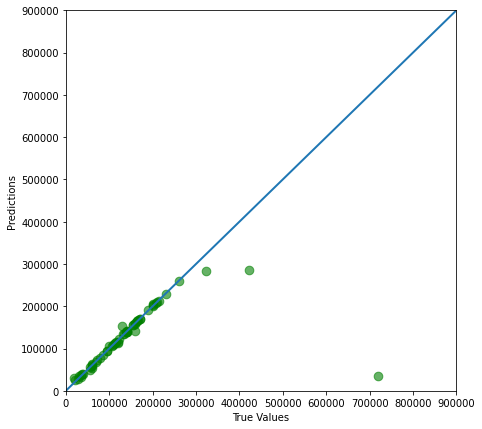

In [544]:
result_vis(SalaryPrediction.x_test, SalaryPrediction.y_test)

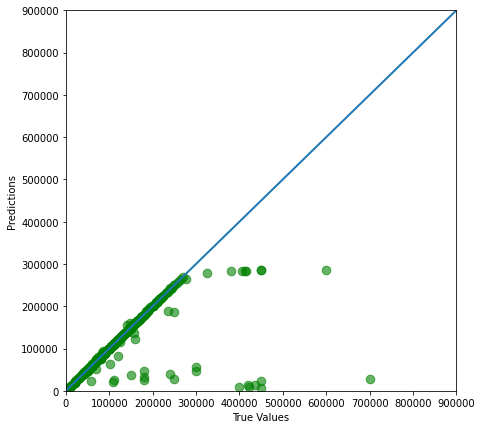

In [540]:
result_vis(SalaryPrediction.x_train, SalaryPrediction.y_train)

In [549]:
def show_error(features, label):
  y_pred = SalaryPrediction.m.predict(features).flatten()
  error = np.absolute(y_pred - label)
  error = pd.DataFrame({
      'true values' : label,
      'prediction values': y_pred,
      'error' : error
  })
  return error

In [553]:
show_error(SalaryPrediction.x_test, SalaryPrediction.y_test).head(n=30)

,true values,prediction values,error
508,120000,116452.695312,3547.304688
433,70000,67498.109375,2501.890625
121,200000,202988.609375,2988.609375
120,60000,54343.191406,5656.808594
242,110000,109605.093750,394.906250
497,165000,164873.500000,126.500000
501,30000,35935.851562,5935.851562
192,18000,30854.583984,12854.583984
339,109280,109279.960938,0.039062
157,423000,284594.500000,138405.500000
